# Naibe bayes spam ham classfication module no 22 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("sms_raw_NB.csv",encoding= 'latin-1') # unicode latin 1 to read the dataframe 

In [7]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [9]:
df.columns = ['label','message']

In [11]:
df.head()

,label,message
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [12]:
df.groupby('label').describe() # we described out data nuber of spam n ham count 

message                                                               
        count unique                                                top freq
label                                                                       
ham      4812   4503                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

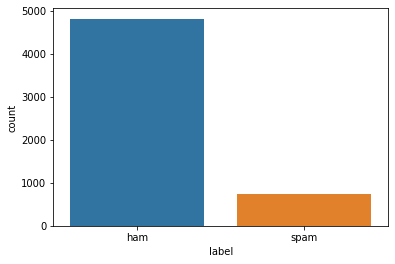

In [13]:
sns.countplot(data=df, x='label') # lets check each catagory of ham and span in label 

# Lets normalizie our text by clenaing text processes 

In [14]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def process(text):
    # lowercase it
    text = text.lower()
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # return token list
    return text

In [16]:
process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!') # for testing our process 

['holiday', 'play', 'cricket', 'jeff', 'play', 'well']

In [17]:
# Test with our dataset and see 
df['message'][:20].apply(process)

0                             [hope, good, week, check]
1                                  [kgive, back, thank]
2                                      [also, cbe, pay]
3     [complimentari, 4, star, ibiza, holiday, å£100...
4     [okmail, dear, dave, final, notic, collect, 4,...
5               [aiya, discuss, later, lar, pick, u, 4]
6                                          [much, buzi]
7                     [pleas, ask, mummi, call, father]
8     [marvel, mobil, play, offici, ultim, spiderman...
9                   [fyi, im, usf, swing, room, whenev]
10    [sure, thing, big, man, hockey, elect, 6, shou...
11                                         [anyth, lor]
12    [march, end, readi, call, sure, problem, capit...
13                            [hmm, well, night, night]
14                 [k, ill, sure, get, noon, see, what]
15               [ha, ha, cool, cool, chikku, chikkudb]
16    [darren, say, dat, u, meet, da, ge, den, dun, ...
17                [dint, tell, anyth, angri, tol

# Lets convert each message word into vectorizer ifidf method 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Fit and transform messages 

In [20]:
tfidf = TfidfVectorizer(analyzer= process)

In [21]:
data = ifidf.fit_transform(df['message']) # transforming our data 

### Lets check what value it gives in out message 

In [34]:
mess = df.iloc[0]['message']
mess2 = df.iloc[2]['message']
print(mess) # first printing our message in each column
print(mess2)# printing our second message 

Hope you are having a good week. Just checking in
Am also doing in cbe only. But have to pay.


In [36]:
data

<5559x8140 sparse matrix of type '<class 'numpy.float64'>'
	with 49308 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.30)

In [43]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

In [44]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process at 0x000001C10F519798>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

# Predictions and evaluations 

In [45]:
predictions = pipeline.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1435
        spam       1.00      0.69      0.81       233

    accuracy                           0.96      1668
   macro avg       0.98      0.84      0.89      1668
weighted avg       0.96      0.96      0.95      1668



In [48]:
print(confusion_matrix(y_test,predictions))

[[1435    0]
 [  73  160]]
